# Taller Evaluado Nº 0: Proceso ETL y Exploración Simple
## TEL-354: Minería de Datos 2020-1 (20200420)
### Prof. Mauricio Araya

### 1.- Extract, Transfer and Load

**1.1**- Busque el ``Toy Dataset`` por Carlo Lepelaars del sitio web **Kaggle**. Kaggle es un portal donde uno puede bajar datasets asdociados a un desafío. Este desafío puede traducirse en premios en dinero, prestigio, regalos o (como ahora en la contingencia COVID-19) el premio puede ser solo aportar para solucionar un problema. 

En la celda siguiente, escriba en Markdown la información de **contexto** del dataset y el link a donde lo encontró. Agregue además una tabla con la descripción de cada columna.

#### Contexto Toy Dataset

Un conjunto de datos ficticios para el análisis de datos exploratorios (EDA) y para probar modelos de predicción simples.

Todos los datos son ficticios. Los datos se han generado para que sus distribuciones sean convenientes para el análisis estadístico.

**PREGUNTA**: ¿A qué tipo de datos corresponde cada columna? (texto, categórico, natural, real, etc.). Agregué esta información a su tabla de deescripción

**RESPUESTA:**

| Variable   | Descripcion                                       | Tipo        |
|------------|---------------------------------------------------|-------------|
| Número     | un número de índice simple para cada fila         | Int         |  
| Ciudad     | la ubicación de una persona                       | Categorica  |
| Genero     | género de una persona                             | Categorica  |
| Edad       | la edad de una persona                            | Int         |
| Ingresos   | ingresos anuales de una persona                   | Float       |
| Enfermedad | está enferma la persona?                          | Bool        |

[Fuente Kaggle](https://www.kaggle.com/carlolepelaars/toy-dataset)

**1.2**- Descargue el dataset y guardelo en el mismo directorio de trabajo en el que está este notebook. 

**PREGUNTA**: En la siguiente celda (en Markdown), explique cuál es el tipo de archivo del dataset copiando alguna breve explicación que encuentre en google, y referenciando la fuente con un link clickeable. Responda además, ¿Qué otros formatos de archivos podrían contener la misma información para este ``Toy Dataset``? Agregue un link además con una explicación de como convertir el ``.csv`` a otro formato.

#### Formato csv
Es la "Lista separada por comas", o CSV, para datos tabulares. Los CSV por lo general tienen una fila de encabezado que consta de nombres de campo legibles por humanos. Una representación CSV de una lista de la compra con una fila de encabezado, por ejemplo, se ve así:

- id, tipo, cantidad
- 0, plátanos, 12
- 1, manzanas, 7

#### Formatos para los dataset
- json 
- SQLite
- Archives
- BigQuery
- NPZ
- PNG
- HDF5

[Fuente csv2json](https://amalgjose.com/2020/03/10/convert-csv-to-json-using-pandas/)

[Fuente Kaggle](https://www.kaggle.com/docs/datasets)

**1.3**- Revise los notebooks en el aula para poder cargar el dataset en memoria. Para esto ocupe la biblioteca ``pandas``, que es un gestor de tablas con compatibilidad en iPython notebooks. Verifique que el objeto DataFrame generado "sabe" como desplegarse en un notebook. Busque además en la documentación de ``pandas`` como conocer el tipo de datos de cada columna e imprima esto en una nueva celda.

In [1]:
import pandas as pd
data = pd.read_csv('toy_dataset.csv')
df = pd.DataFrame(data)
df.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [7]:
# saber el tipo de datos de cada una de las columnas 
df.dtypes

Number       int64
City        object
Gender      object
Age          int64
Income     float64
Illness     object
dtype: object

In [12]:
ill = (df['Illness']=='Yes')
ill

0         False
1         False
2         False
3         False
4         False
          ...  
149995    False
149996    False
149997    False
149998    False
149999    False
Name: Illness, Length: 150000, dtype: bool

**PREGUNTA**: ¿La información de tipos que usted escribió en el punto 1.1 está completamente contenida en lo que ``pandas`` reporta? Explique en no más de 3 frases.

**RESPUESTA**: La informacion de la respuesta 1.1 esta contenida en la informacion entregada por pandas dado ha que este toma todos los valores string como objetos

### 2- Exploración Simple de Datos

**2.1**- El objeto básico de ``pandas`` se llama ``DataFrame``. Busque como imprimir una *estadística descriptiva* de los datos (media, desviación estándar, percentiles, etc.).

In [3]:
#Forma I
#mean
print('Mean')
print(df.mean())
#std
print('\nstd')
print(df.std())
#percentile
print('\npercentille')
print(df.quantile(0.1))

Mean
Number    75000.500000
Age          44.950200
Income    91252.798273
dtype: float64

std
Number    43301.414527
Age          11.572486
Income    24989.500948
dtype: float64

percentille
Number    15000.9
Age          29.0
Income    52638.0
Name: 0.1, dtype: float64


In [4]:
#Forma II
#Estadisticos de pandas
df.describe()

,Number,Age,Income
count,150000.000000,150000.000000,150000.000000
mean,75000.500000,44.950200,91252.798273
std,43301.414527,11.572486,24989.500948
min,1.000000,25.000000,-654.000000
25%,37500.750000,35.000000,80867.750000
50%,75000.500000,45.000000,93655.000000
75%,112500.250000,55.000000,104519.000000
max,150000.000000,65.000000,177157.000000


**PREGUNTA**: Solo para algunas columnas hace sentido hacer una descripción estadística. ¿Cuáles son y por qué? 

**RESPUESTA**: Solo aquellas columnas que son de variable cuantitativa son las que tiene sentido aplicar un estadistico estas columnas son:
- Number
- Age
- Income

**2.2**- Utilice la biblioteca de visualización llamada ``matplotlib`` para hacer un gráfico de dispersión de la edad y el ingreso (no tenga miedo a hacer copy/paste). Modifique su gráfico para imprimir de distinto color los individuos enfermos. Puede modificar con el parámetro alpha para obtener una mejor visualización.

Text(0.5, 1.0, 'Age vs Income')

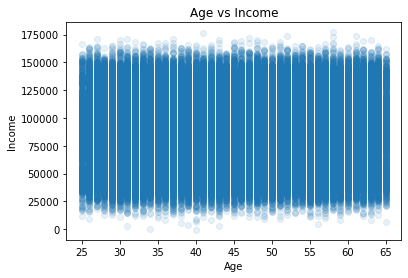

In [5]:
# grafica edad vs ingreso
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.scatter(df.Age,df.Income,alpha=0.1)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age vs Income')

Text(0.5, 1.0, 'Income vs Age')

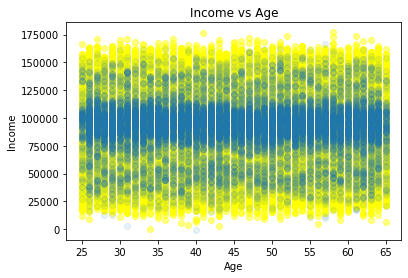

In [6]:
import matplotlib.pyplot as plt
sick = df[df['Illness'] == 'No']
healthy  = df[df['Illness'] == 'Yes']

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(sick.Age,sick.Income,c='yellow',alpha=0.5)
ax1.scatter(healthy.Age,healthy.Income,alpha=0.1)
ax1.set_xlabel('Age')
ax1.set_ylabel('Income')
ax1.set_title('Income vs Age')

**PREGUNTA**: ¿Puede sacar alguna conclusión ya de los datos seleccionados? (máximo 3)

**RESPUESTA**: 
- Los rangos que se ven mas afectados por la enfermedad son aquellos que presentan bajos ingresos [0 - 50000] y aquellos que presentas mas ingresos [150000 - 175000]
- Las edades se ven afectadas por igual por la enfermedad

**2.3**- Utilice ahora la biblioteca ``seaborn`` y su función ``pairplot`` sobre el DataFrame para hacer visualizaciones avanzadas de forma automática. Puede por ejemplo establecer el color de distintas variables categóricas utilizando ``hue``. 

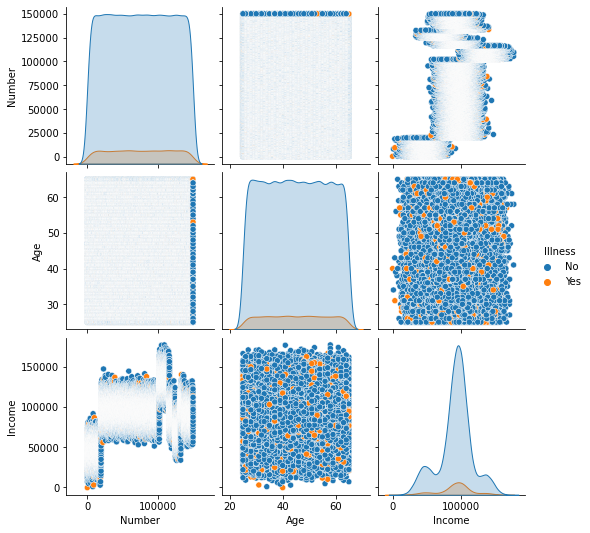

In [6]:
import seaborn
seaborn.pairplot(df, hue ='Illness')

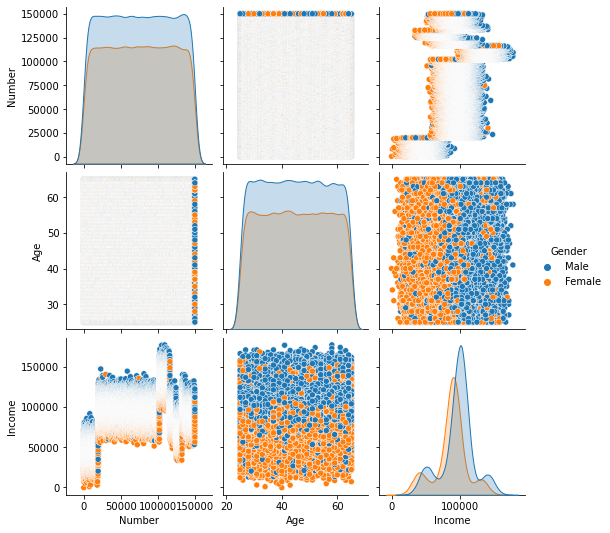

In [7]:
seaborn.pairplot(df, hue ='Gender')

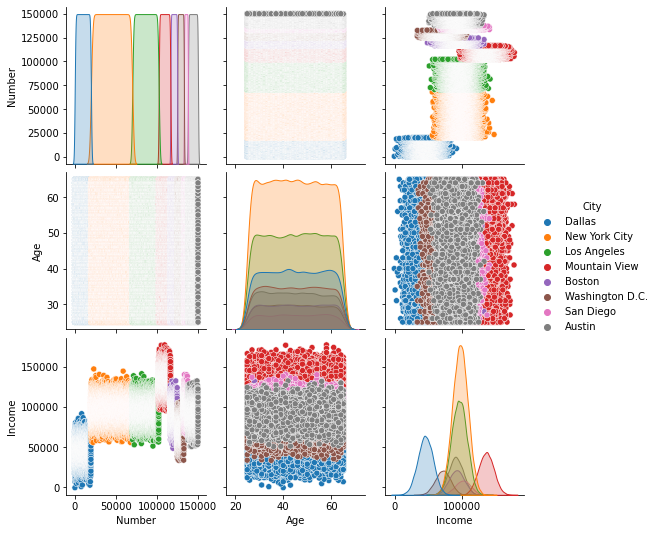

In [8]:
seaborn.pairplot(df, hue ='City')

**PREGUNTA**: ¿Qué conclusiones puede usted sacar sobre la distribución de la enfermedad, el género y la ciudad?

**RESPUESTA**: 
- Los hombres reciben mas ingresos que las mujeres
- La ciudad con mas ingresos es Mountain View 
- La ciudad de menos ingresos es Dallas
- Bajo la grafica de ingresos vs edad en la variable de enfermedad se puede decir que la enfermedad afecta de manera uniforme a la poblacion

### 3- Subgrupos
**3.1** Una herramienta importante en el análisis de variables categóricas es el agrupar por sus valores. La función ``groupby`` de ``pandas`` permite realizar una vista de esta forma. Agrupe los datos por ciudad e imprima la cantidad de individuos que hay en cada ciudad. Además describa las variables agrupadas de enfermedad e ingreso. 

In [9]:
df.groupby('City')['Number'].count()

City
Austin             12292
Boston              8301
Dallas             19707
Los Angeles        32173
Mountain View      14219
New York City      50307
San Diego           4881
Washington D.C.     8120
Name: Number, dtype: int64

In [10]:
df.groupby('City')['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
City,,,,,,,,
Austin,12292.0,90277.513423,10996.636090,50602.0,82891.75,90278.5,97755.5,132302.0
Boston,8301.0,91554.571497,11216.142107,48425.0,83892.00,91607.0,99110.0,132348.0
Dallas,19707.0,45252.231187,11263.867909,-654.0,37720.50,45268.0,53021.5,91479.0
Los Angeles,32173.0,95264.155410,11187.234580,51131.0,87589.00,95291.0,102935.0,141249.0
Mountain View,14219.0,135078.415782,11227.302304,95202.0,127482.00,135220.0,142738.5,177157.0
New York City,50307.0,96857.131393,11210.580111,55538.0,89184.00,96920.0,104516.5,147170.0
San Diego,4881.0,100756.209178,11149.283188,64941.0,93193.00,100859.0,108394.0,140190.0
Washington D.C.,8120.0,70991.612808,11079.854228,33335.0,63571.75,71230.0,78563.5,107704.0


In [11]:
df.groupby('City')['Illness'].describe()

,count,unique,top,freq
City,,,,
Austin,12292,2,No,11281
Boston,8301,2,No,7615
Dallas,19707,2,No,18094
Los Angeles,32173,2,No,29605
Mountain View,14219,2,No,13041
New York City,50307,2,No,46286
San Diego,4881,2,No,4487
Washington D.C.,8120,2,No,7452


**PREGUNTA**: ¿Qué conclusiones simples puede usted sacar de estas descripciones? (solo 2)

**RESPUESTA**: 
- La ciudad con mas ingresos es Mountain View 
- La ciudad con mayor caso de enfermos es New York 

**3.2** Calcule el ratio de personas enfermas por ciudad y comparela con el ingreso medio en cada ciudad.

**PREGUNTA FINAL**: ¿Existe una relación entre el ratio de personas enfermas y el ingreso medio? Soporte su respuesta en los gráficos y/o tablas generadas hasta este punto. 

**RESPUESTA**: